In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('D:/Kelas Work/dataset/ADANIPORTS.csv')

In [3]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [4]:
# Set 'Date' as the index (important for time series)
df.set_index('Date', inplace=True)

In [5]:
print(df.head())

                Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     NaN   

            Deliverable Volume  

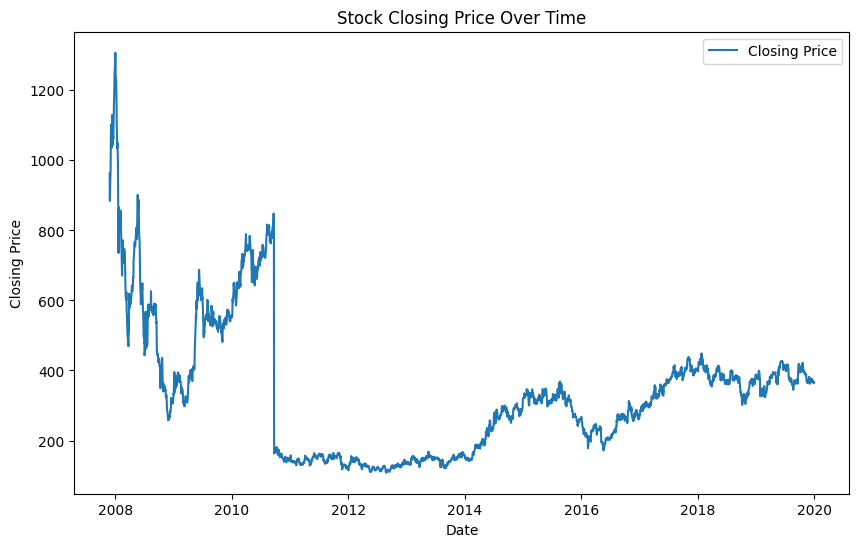

In [6]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [7]:
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  2993.000000  2993.000000  2993.000000  2993.000000  2993.000000   
mean    335.464384   336.065987   342.786853   328.961894   335.487337   
std     195.714240   196.349373   201.456890   191.296805   195.883211   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     156.500000   156.500000   159.750000   153.600000   157.000000   
50%     314.150000   315.000000   319.950000   308.700000   314.000000   
75%     398.750000   399.000000   405.300000   391.550000   398.150000   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  2993.000000  2993.000000  2.993000e+03  2.993000e+03    2126.000000   
mean    335.441898   336.143976  2.415617e+06  7.328238e+13   37579.424741   
std     195.703575   196.571658  2.644873e+06  9.703476e+13   26153.821111   
min     108.000000   

In [8]:
df.isnull().sum()  # Check for missing values

# If missing values are found, handle them, for example by forward filling
df.fillna(method='ffill', inplace=True)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Close']]), columns=['Close'], index=df.index)

In [10]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

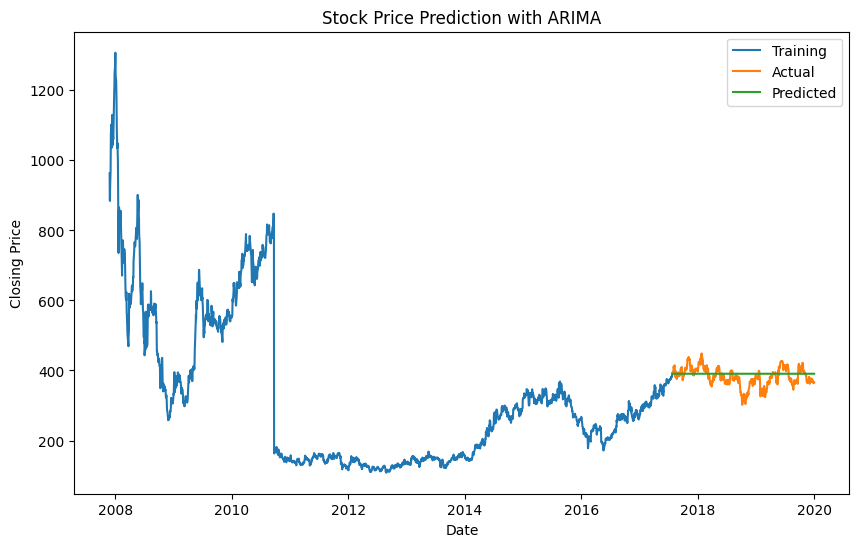

In [11]:
# Fit the ARIMA model
model = ARIMA(train['Close'], order=(5, 1, 0))  # (p, d, q) values need tuning
model_fit = model.fit()

# Predict the test data
predictions = model_fit.forecast(steps=len(test))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Training')
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
print('RMSE:', rmse)

RMSE: 27.745795743529307
